In [1]:
# Import Libraries
require 'daru'
require 'numo/linalg/autoloader'
require 'rumale'
require 'numo/gnuplot'

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

true

In [3]:
# Import Dataset
df = Daru::DataFrame.from_csv('salary_data.csv')

# Convert dataset to Numo::NArray dataset
data = Numo::DFloat.cast df['YearsExperience', 'Salary'].to_a[0].map { |data| data.values }
x = data[true, 0].expand_dims(1)
y = data[true, 1]
nil

In [4]:
# Split dataset into Training and Test set
model_selection = Rumale::ModelSelection::ShuffleSplit.new(n_splits: 1, test_size: 0.3, random_seed: 1)
train_ids, test_ids = model_selection.split(x, y).first
x_train, x_test = x[train_ids, true], x[test_ids, true]
y_train, y_test = y[train_ids], y[test_ids]
nil

In [5]:
# Fit traning set data and predict test set results
model = Rumale::LinearModel::LinearRegression.new(solver: 'svd')
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
nil

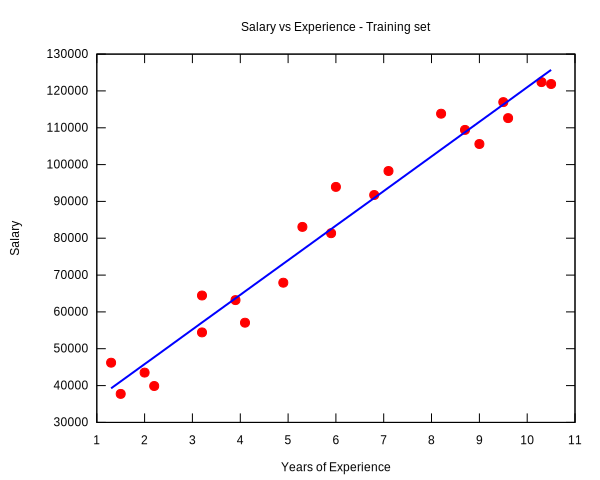

In [6]:
# Visualize training set results
Numo.noteplot do
  set title: 'Salary vs Experience - Training set'
  set xlabel: 'Years of Experience'
  set ylabel: 'Salary'
  plot [x_train, y_train, notitle: true, with: 'points', pt: 7, lt: { rgb: 'red' }],
       [x_train, model.predict(x_train), notitle: true, w:'lines', lt: { rgb: 'blue', lw: 2 }]
end

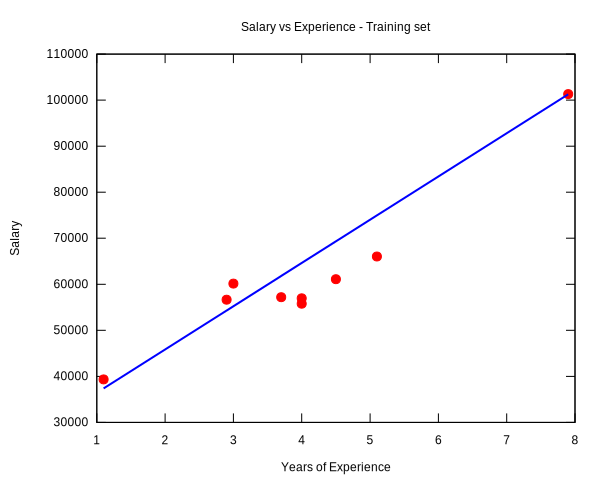

In [7]:
# Visualize test set results
Numo.noteplot do
  set title: 'Salary vs Experience - Training set'
  set xlabel: 'Years of Experience'
  set ylabel: 'Salary'
  plot [x_test, y_test, notitle: true, with: 'points', pt: 7, lt: { rgb: 'red' }],
       [x_test, y_pred, notitle: true, w:'lines', lt: { rgb: 'blue', lw: 2 }]
end

In [8]:
# Predict salaries for years of experience - 10, 12
model.predict([[10],[12]])

Numo::DFloat#shape=[2]
[121009, 139802]